# Hybrid Plant with Battery Storage Example
---
In this example, we will explore how to simulate a hybrid renewable energy system that includes both wind and solar power sources, along with battery energy storage. The battery uses the default dispatch model,simple dispatch, which uses a profit maximization objective function.

The key aspects we will cover include setting up the simulation environment, configuring the system, running the simulation, and visualizing the results.

### Import Required Modules
Begin by importing the necessary modules for the simulation.

In [1]:
from hopp.simulation import HoppInterface
from hopp.tools.dispatch.plot_tools import (
    plot_battery_output, plot_battery_dispatch_error, plot_generation_profile
)

/Users/kbrunik/github/HOPP/examples/log/hybrid_systems_2024-10-25T16.02.16.530664.log


### Create the Simulation Model
Instantiate the `HoppInterface` class by providing a YAML configuration.

In order to configure the battery dispatch model, ensure that you include a `grid_resource_file` within the `site` section, and incorporate the `battery` size and capacity into the `technologies` section of the YAML configuration.

In [2]:
hi = HoppInterface("./inputs/03-wind-solar-battery.yaml")

### Run the Simulation
Simulate the hybrid renewable energy system for a specified number of years (in this case, 20 years).

In [3]:
hi.simulate(project_life=20)

### Print Simulation Results
Access and display various simulation results, including annual energies, net present values (NPVs), and total revenues.

In [4]:
hybrid_plant = hi.system

print("Output after losses over gross output:",
      hybrid_plant.wind.value("annual_energy") / hybrid_plant.wind.value("annual_gross_energy"))

# Save the outputs
annual_energies = hybrid_plant.annual_energies
npvs = hybrid_plant.net_present_values
revs = hybrid_plant.total_revenues

print("Annual Energies:")
print(annual_energies)

print("Net Present Values:")
print(npvs)

print("Total Revenues:")
print(revs)

Output after losses over gross output: 0.7997475965518006
Annual Energies:
{"pv": 104284756.32608213, "wind": 156936144.3525474, "battery": -795415.5004441408, "hybrid": 256272713.7000136}
Net Present Values:
{"pv": -5045283.846785046, "wind": -2604711.4755556285, "battery": -16865165.450563535, "hybrid": -26610985.83295867}
Total Revenues:
{"pv": [0.0, 4041394.7933880636, 4081808.7413219437, 4122626.8287351634, 4163853.0970225157, 4205491.62799274, 4247546.544272669, 4290022.009715394, 4332922.2298125485, 4376251.452110674, 4420013.96663178, 4464214.106298098, 4508856.24736108, 4553944.80983469, 4599484.257933037, 4645479.100512368, 4691933.891517491, 4738853.230432667, 4786241.762736993, 4834104.180364363, 4882445.222168007], "wind": [0.0, 6164508.562673732, 6226153.648300469, 6288415.184783474, 6351299.336631309, 6414812.3299976215, 6478960.453297599, 6543750.057830575, 6609187.55840888, 6675279.433992969, 6742032.228332898, 6809452.550616228, 6877547.07612239, 6946322.546883614, 70

### Visualize Simulation Results (Optional)
Optionally, you can visualize the simulation results using plots. Several functions are provided for plotting battery output, generation profiles, and dispatch errors.

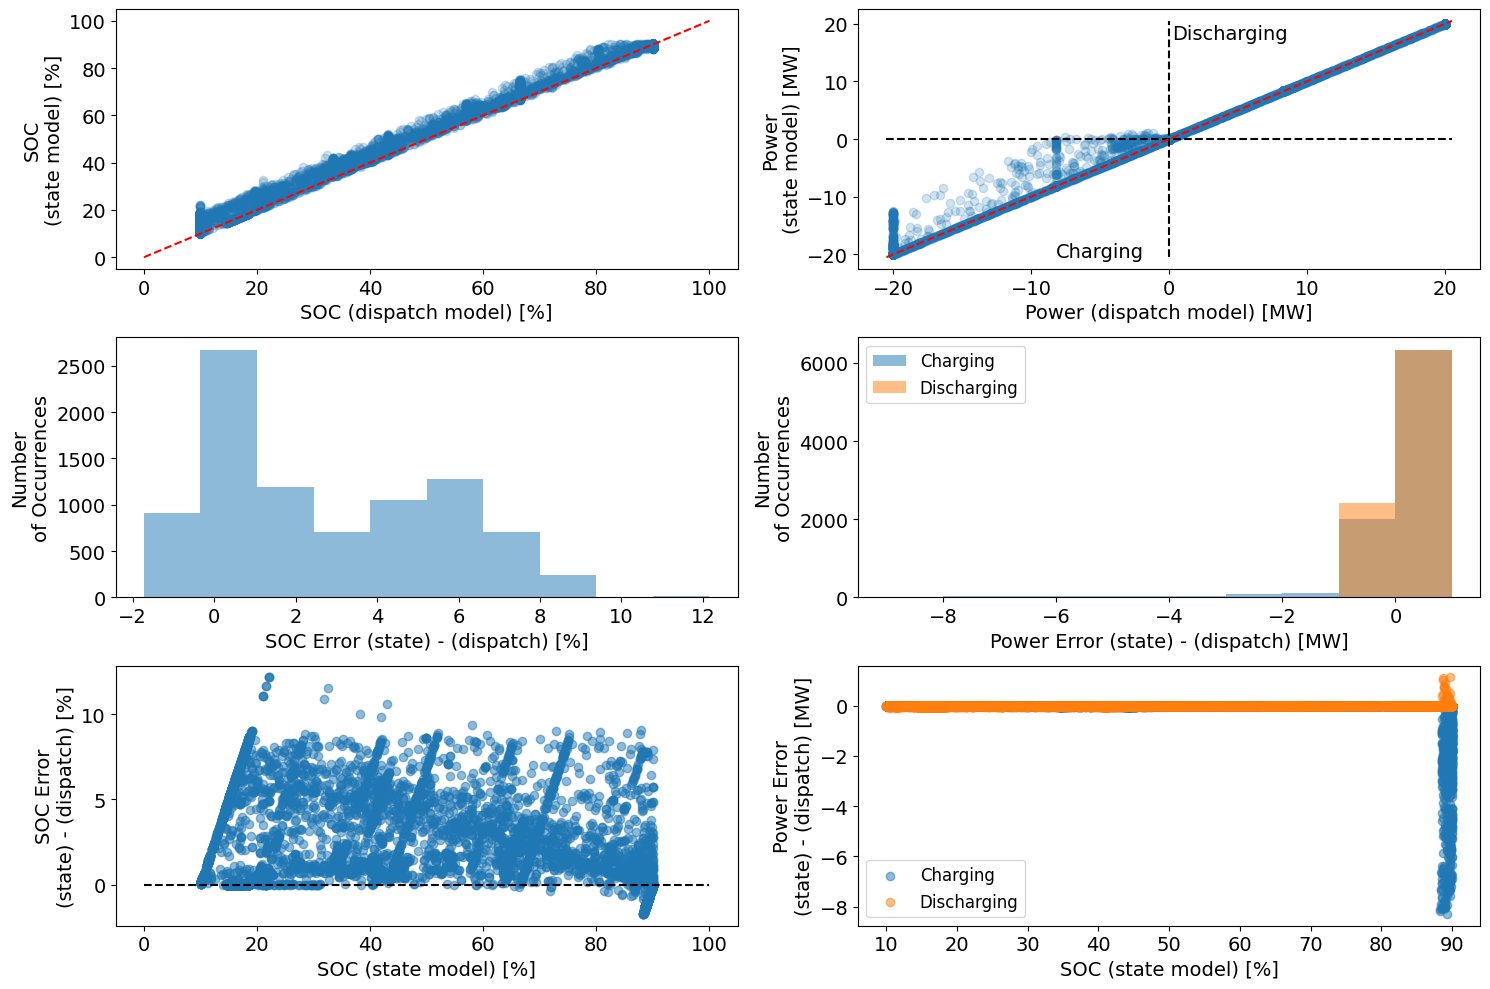

In [5]:
plot_battery_dispatch_error(hybrid_plant)

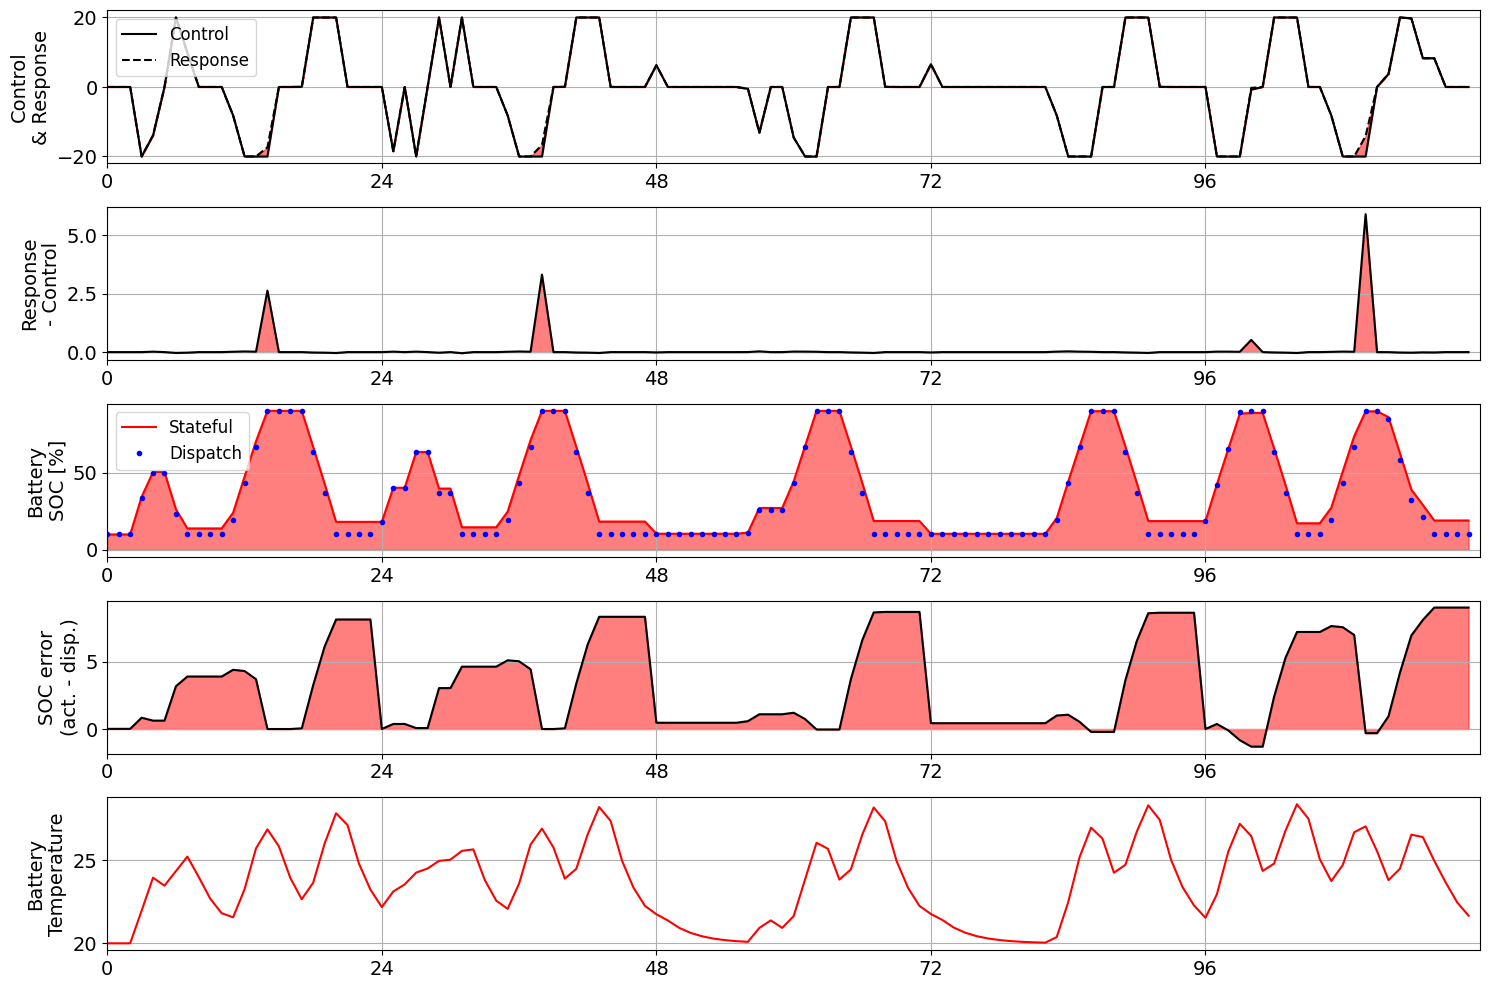

In [6]:
plot_battery_output(hybrid_plant)

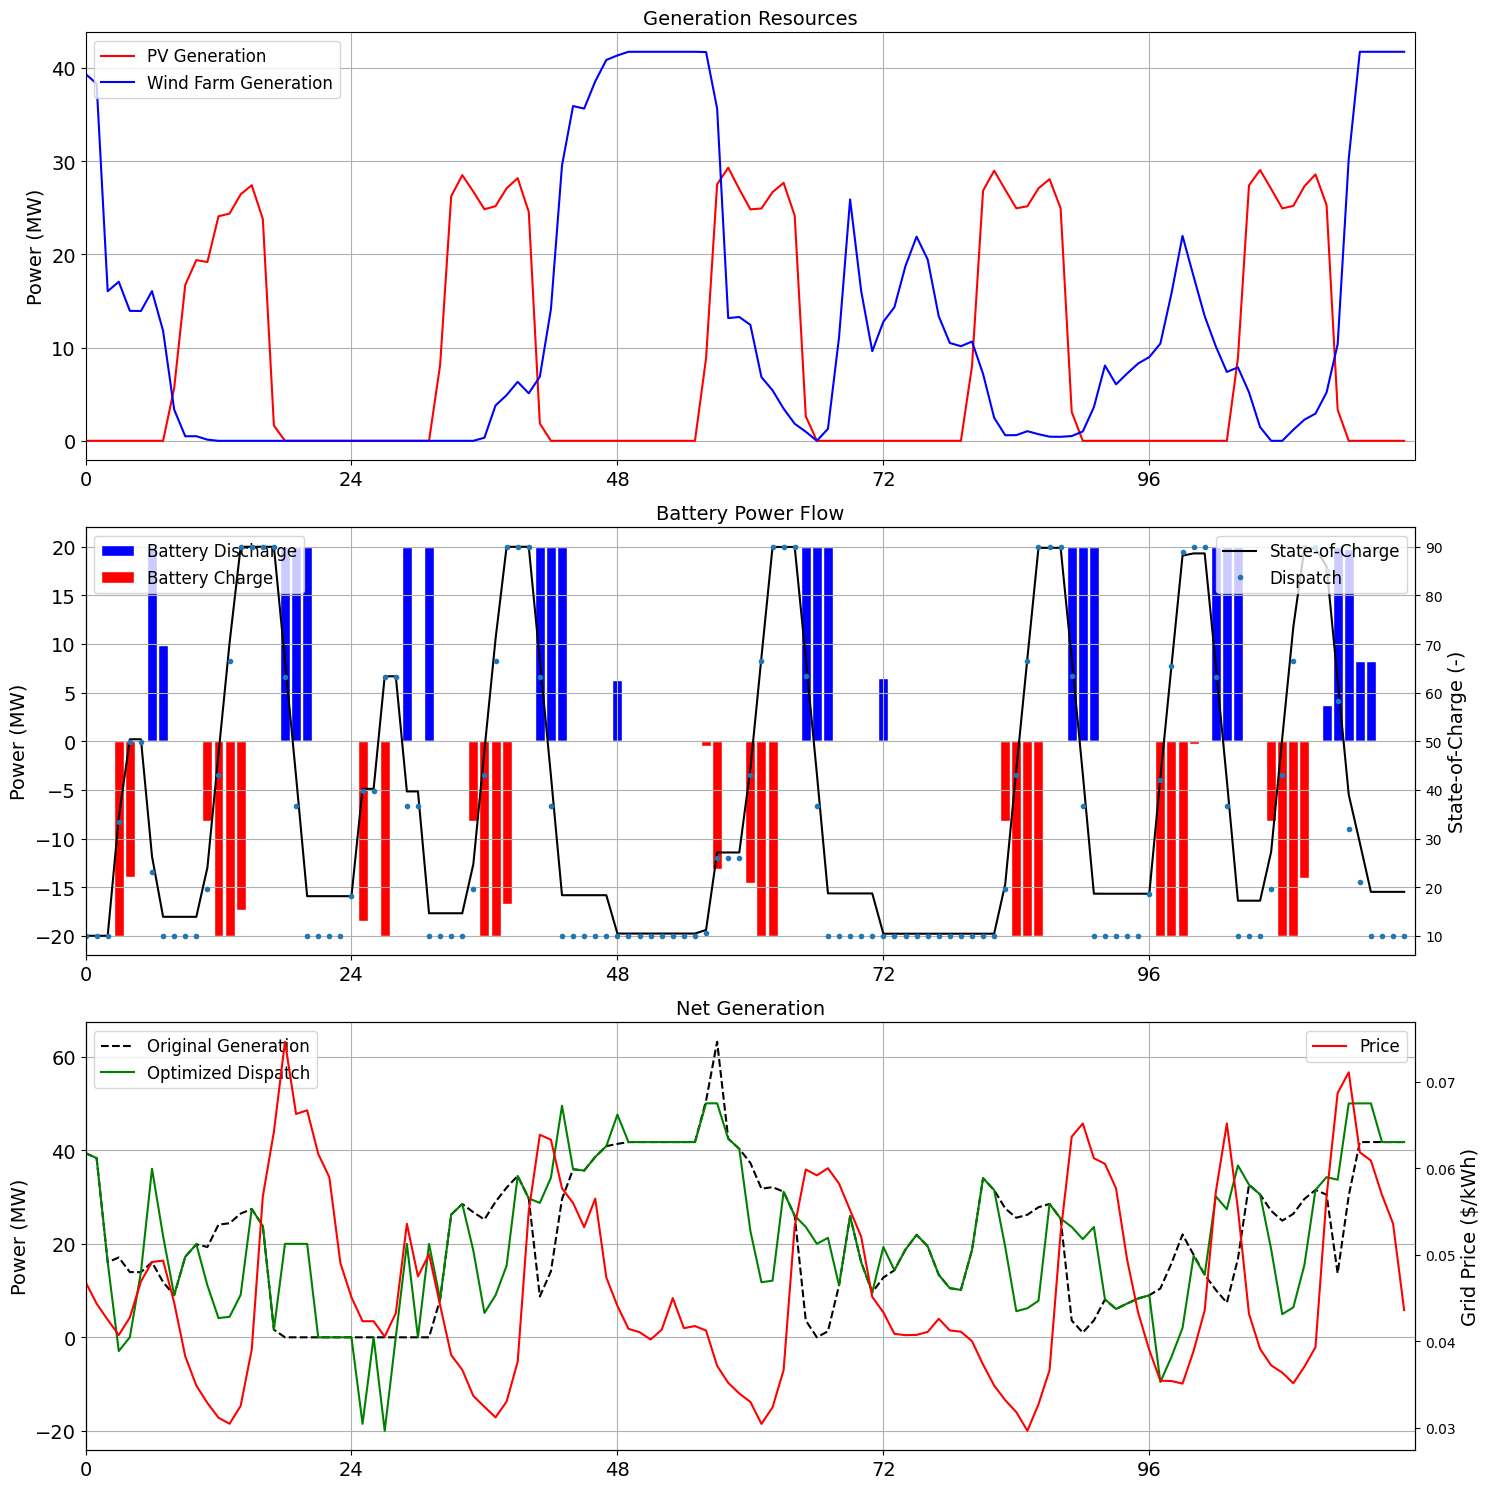

In [7]:
plot_generation_profile(hybrid_plant)